# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [151]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/patrickcorr/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [152]:
# Read your api key environment variable
from newsapi import NewsApiClient
load_dotenv()
api_key = os.getenv("NEWS_API_KEY")
print(api_key)

222fa0ebcb7b4af898742db202d497c4


In [153]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)

In [154]:
# Fetch the Bitcoin news articles
bitcoin_articles = newsapi.get_everything(q='bitcoin', language = 'en')
#bitcoin_articles

In [155]:
# Fetch the Ethereum news articles
ethereum_articles = newsapi.get_everything(q='ethereum', language = 'en')

In [156]:
#create df function
def create_df(news):
    articles = []
    for article in news:
        try:
            title = article["title"]
            description = article["description"]
            text = article["content"]
            date = article["publishedAt"][:10]

            articles.append({
                "title": title,
                "description": description,
                "text": text,
                "date": date
            })
        except AttributeError:
            pass

    return pd.DataFrame(articles)

In [157]:
# Create the Bitcoin sentiment scores DataFrame
bitcoin_df = create_df(bitcoin_articles["articles"])
bitcoin_df.head()

,title,description,text,date
0,Miami’s Bitcoin Conference Left a Trail of Har...,"For some women, inappropriate conduct from oth...","Now, even though there are a number of women-f...",2022-05-10
1,Why fossil fuel companies see green in Bitcoin...,ExxonMobil and other fossil fuel companies hav...,A Bitcoin mining site powered by otherwise los...,2022-05-04
2,Wikipedia editors vote to block cryptocurrency...,Wikipedia editors have voted in favor of dropp...,Wikipedia editors have voted in favor of dropp...,2022-04-14
3,Warren Buffett Says He Wouldn't Take All the B...,Warren Buffett has always been a bitcoin skept...,Warren Buffett has always been a bitcoin skept...,2022-05-02
4,Bitcoin value drops by 50% since November peak,The slide in the value of cryptocurrencies com...,"Image source, Getty Images\r\nThe value of Bit...",2022-05-09


In [158]:
# Create the Ethereum sentiment scores DataFrame
ethereum_df = create_df(ethereum_articles["articles"])
ethereum_df.head()

,title,description,text,date
0,US blames North Korean hacker group for $625 m...,The US Department of Treasury has attributed t...,The US Department of Treasury says Lazarus is ...,2022-04-14
1,Wikipedia community votes to stop accepting cr...,Critics argue the bitcoin and ethereum network...,"18 with 15 posters participating, including st...",2022-04-13
2,Here's what NFTs look like on Instagram,Meta has revealed more of how NFTs will work o...,Meta has revealed more of how NFTs will work o...,2022-05-10
3,Opera's crypto browser is now available on iOS,"Opera launched its dedicated ""Crypto Browser"" ...","Opera launched its dedicated ""Crypto Browser"" ...",2022-04-15
4,Yuga Labs apologises after sale of virtual lan...,Demand for plots of land in multiplayer game O...,A multi-billion dollar cryptocurrency company ...,2022-05-02


In [159]:
#create sentiment score function
def get_sentiment(score):
    """
    Calculates the sentiment based on the compound score.
    """
    result = 0  # Neutral by default
    if score >= 0.05:  # Positive
        result = 1
    elif score <= -0.05:  # Negative
        result = -1

    return result

In [167]:
# Sentiment scores dictionaries
text_sent = {
    "text_compound": [],
    "text_pos": [],
    "text_neu": [],
    "text_neg": [],
    "text_sent": [],
}

# Get sentiment for the text
for index, row in bitcoin_df.iterrows():
    try:
        # Sentiment scoring with VADER
        text_sentiment = analyzer.polarity_scores(row["text"])
        text_sent["text_compound"].append(text_sentiment["compound"])
        text_sent["text_pos"].append(text_sentiment["pos"])
        text_sent["text_neu"].append(text_sentiment["neu"])
        text_sent["text_neg"].append(text_sentiment["neg"])
        text_sent["text_sent"].append(get_sentiment(text_sentiment["compound"]))
    except AttributeError:
        pass

# Attaching sentiment columns to the News DataFrame

btc_text_sentiment_df = pd.DataFrame(text_sent)

#btc_text_sentiment_df.head()



In [168]:
# Sentiment scores dictionaries
text_sent = {
    "text_compound": [],
    "text_pos": [],
    "text_neu": [],
    "text_neg": [],
    "text_sent": [],
}

# Get sentiment for the text
for index, row in ethereum_df.iterrows():
    try:
        text_sentiment = analyzer.polarity_scores(row["text"])
        text_sent["text_compound"].append(text_sentiment["compound"])
        text_sent["text_pos"].append(text_sentiment["pos"])
        text_sent["text_neu"].append(text_sentiment["neu"])
        text_sent["text_neg"].append(text_sentiment["neg"])
        text_sent["text_sent"].append(get_sentiment(text_sentiment["compound"]))
    except AttributeError:
        pass

# Attaching sentiment columns to the News DataFrame

eth_text_sentiment_df = pd.DataFrame(text_sent)

#eth_text_sentiment_df.head(10)


In [169]:
# Describe the Bitcoin Sentiment
btc_text_sentiment_df.describe()

,text_compound,text_pos,text_neu,text_neg,text_sent
count,20.000000,20.000000,20.000000,20.000000,20.000000
mean,0.082600,0.078800,0.862350,0.058850,0.200000
std,0.368099,0.063205,0.092202,0.060548,1.005249
min,-0.440400,0.000000,0.557000,0.000000,-1.000000
25%,-0.273200,0.040500,0.831500,0.000000,-1.000000
50%,0.089950,0.077000,0.879500,0.063000,1.000000
75%,0.355075,0.085750,0.924250,0.072500,1.000000
max,0.750600,0.202000,0.964000,0.241000,1.000000


In [170]:
# Describe the Ethereum Sentiment
eth_text_sentiment_df.describe()

,text_compound,text_pos,text_neu,text_neg,text_sent
count,20.000000,20.000000,20.000000,20.000000,20.000000
mean,-0.067905,0.053050,0.879950,0.066950,-0.250000
std,0.476251,0.064728,0.076775,0.073236,0.966546
min,-0.784500,0.000000,0.681000,0.000000,-1.000000
25%,-0.317450,0.000000,0.827250,0.000000,-1.000000
50%,-0.249750,0.023000,0.899500,0.063000,-1.000000
75%,0.303775,0.085000,0.937000,0.077750,1.000000
max,0.735100,0.188000,1.000000,0.233000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: The highest mean positive was Bitcoin text field at 0.0788, followed by Ethereum text at 0.04415The highest positive.

Q: Which coin had the highest compound score?

A: The highest compound value was Bitcoin text at 0.0661. 

Q. Which coin had the highest positive score?

A: The highest positive score was Bitcoin at 0.2020

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [171]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [172]:
# Instantiate the lemmatizer
wnl = WordNetLemmatizer() 

# Create a list of stopwords
stop = stopwords.words('english')

# Expand the default stopwords list if necessary
stop.append("u")
stop.append("it'")
stop.append("'s")
stop.append("n't")
stop.append('…')
stop.append("\`")
stop.append('``')
stop.append('char')
stop.append("''")
stop = set(stop)

In [173]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Create a list of the words
    words = word_tokenize(text)

    # Convert the words to lowercase
    words = list(filter(lambda w: w.lower(), words))
    
    # Remove the punctuation
    words = list(filter(lambda t: t not in punctuation, words))
    
    # Remove the stopwords
    words = list(filter(lambda t: t.lower() not in stop, words))
    
    # Lemmatize Words into root words
    tokens = [wnl.lemmatize(word) for word in words]
    
    return tokens

In [174]:
# Create a new tokens column for Bitcoin
bitcoin_df["tokens"] = bitcoin_df.text.apply(tokenizer)
bitcoin_df.head()

,title,description,text,date,tokens
0,Miami’s Bitcoin Conference Left a Trail of Har...,"For some women, inappropriate conduct from oth...","Now, even though there are a number of women-f...",2022-05-10,"[even, though, number, women-focused, crypto, ..."
1,Why fossil fuel companies see green in Bitcoin...,ExxonMobil and other fossil fuel companies hav...,A Bitcoin mining site powered by otherwise los...,2022-05-04,"[Bitcoin, mining, site, powered, otherwise, lo..."
2,Wikipedia editors vote to block cryptocurrency...,Wikipedia editors have voted in favor of dropp...,Wikipedia editors have voted in favor of dropp...,2022-04-14,"[Wikipedia, editor, voted, favor, dropping, cr..."
3,Warren Buffett Says He Wouldn't Take All the B...,Warren Buffett has always been a bitcoin skept...,Warren Buffett has always been a bitcoin skept...,2022-05-02,"[Warren, Buffett, always, bitcoin, skeptic, bi..."
4,Bitcoin value drops by 50% since November peak,The slide in the value of cryptocurrencies com...,"Image source, Getty Images\r\nThe value of Bit...",2022-05-09,"[Image, source, Getty, Images, value, Bitcoin,..."


In [175]:
# Create a new tokens column for Ethereum
ethereum_df["tokens"] = ethereum_df.text.apply(tokenizer)
ethereum_df.head()

,title,description,text,date,tokens
0,US blames North Korean hacker group for $625 m...,The US Department of Treasury has attributed t...,The US Department of Treasury says Lazarus is ...,2022-04-14,"[US, Department, Treasury, say, Lazarus, behin..."
1,Wikipedia community votes to stop accepting cr...,Critics argue the bitcoin and ethereum network...,"18 with 15 posters participating, including st...",2022-04-13,"[18, 15, poster, participating, including, sto..."
2,Here's what NFTs look like on Instagram,Meta has revealed more of how NFTs will work o...,Meta has revealed more of how NFTs will work o...,2022-05-10,"[Meta, revealed, NFTs, work, Instagram, US-bas..."
3,Opera's crypto browser is now available on iOS,"Opera launched its dedicated ""Crypto Browser"" ...","Opera launched its dedicated ""Crypto Browser"" ...",2022-04-15,"[Opera, launched, dedicated, Crypto, Browser, ..."
4,Yuga Labs apologises after sale of virtual lan...,Demand for plots of land in multiplayer game O...,A multi-billion dollar cryptocurrency company ...,2022-05-02,"[multi-billion, dollar, cryptocurrency, compan..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [176]:
from collections import Counter
from nltk import ngrams

In [177]:
# Generate the Bitcoin N-grams where N=2
def process_text(doc):
    sw = set(stopwords.words('english'))
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', doc)
    words = word_tokenize(re_clean)
    lem = [wnl.lemmatize(word) for word in words]
    output = [word.lower() for word in lem if word.lower() not in sw]
    return output 
    # Combine all articles in corpus into one large string
def word_counter(bitcoin_df):   
    big_string = ' '.join(bitcoin_df)
    processed = process_text(big_string)
    top_10 = dict(Counter(processed).most_common(10))
    return pd.DataFrame(list(top_10.items()), columns=['word', 'count'])
#word_counter(bitcoin_df)
def bigram_counter(bitcoin_df): 
    # Combine all articles in corpus into one large string
    big_string = ' '.join(bitcoin_df)
    processed = process_text(big_string)
    bigrams = ngrams(processed, n=2)
    top_10 = dict(Counter(bigrams).most_common(10))
    return pd.DataFrame(list(top_10.items()), columns=['bigram', 'count'])
bigram_counter(bitcoin_df['text'])

,bigram,count
0,"(reuters, bitcoin)",4
1,"(previous, closebitcoin)",3
2,"(closebitcoin, world)",3
3,"(world, biggest)",3
4,"(biggest, bestknown)",3
5,"(bestknown, cryptocurrency)",3
6,"(may, reuters)",3
7,"(b, char)",2
8,"(wikipedia, editor)",2
9,"(char, april)",2


In [197]:
# Generate the Ethereum N-grams where N=2
def word_counter(ethereum_df):   
    big_string = ' '.join(ethereum_df)
    processed = process_text(big_string)
    top_10 = dict(Counter(processed).most_common(10))
    return pd.DataFrame(list(top_10.items()), columns=['word', 'count'])
#word_counter(bitcoin_df)
def bigram_counter(ethereum_df): 
    # Combine all articles in corpus into one large string
    big_string = ' '.join(ethereum_df)
    processed = process_text(big_string)
    bigrams = ngrams(processed, n=2)
    top_10 = dict(Counter(bigrams).most_common(10))
    return pd.DataFrame(list(top_10.items()), columns=['bigram', 'count'])
bigram_counter(ethereum_df['text'])

,bigram,count
0,"(reuters, bitcoin)",3
1,"(previous, closebitcoin)",3
2,"(closebitcoin, world)",3
3,"(world, biggest)",3
4,"(biggest, bestknown)",3
5,"(bestknown, cryptocurrency)",3
6,"(yacht, club)",2
7,"(char, april)",2
8,"(april, reuters)",2
9,"(ha, promised)",2


In [179]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [199]:
# Use token_count to get the top 10 words for Bitcoin
word_counter(bitcoin_df['text'])

,word,count
0,char,19
1,bitcoin,12
2,cryptocurrency,10
3,ha,5
4,world,5
5,reuters,5
6,april,4
7,online,4
8,dropped,4
9,week,4


In [181]:
# Use token_count to get the top 10 words for Ethereum
word_counter(ethereum_df['text'])

,word,count
0,char,20
1,cryptocurrency,7
2,ha,6
3,ethereum,6
4,bitcoin,6
5,april,4
6,biggest,4
7,year,4
8,reuters,4
9,world,4


---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [182]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

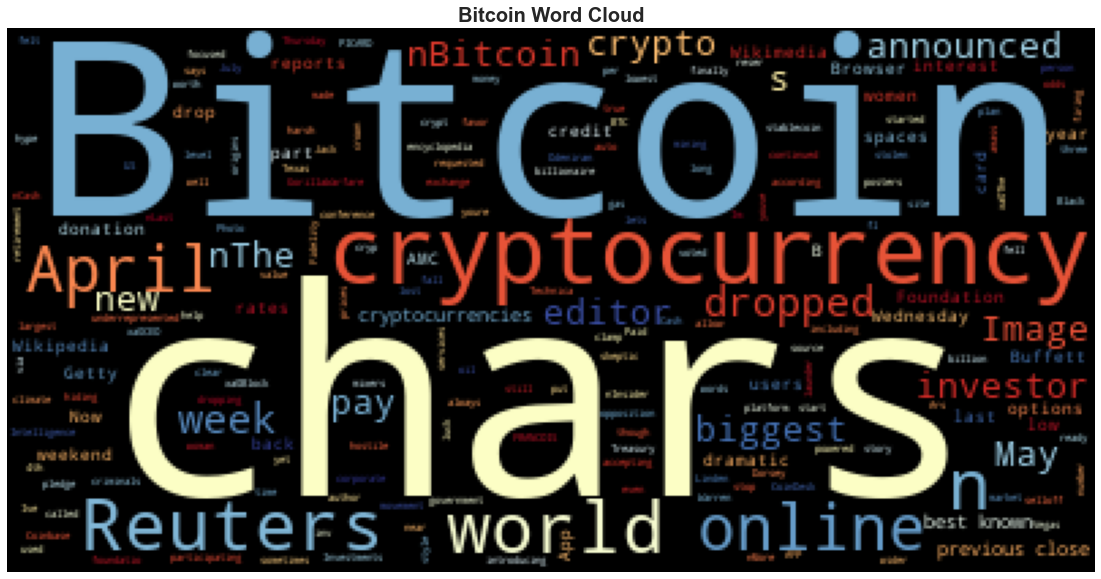

In [183]:
# Generate the Bitcoin word cloud
# Create a string list of terms to generate the word cloud
terms_list_btc = str(bitcoin_df["text"].tolist())

# Create the word cloud
wordcloud = WordCloud(colormap="RdYlBu").generate(terms_list_btc)
plt.imshow(wordcloud)
plt.axis("off")
fontdict = {"fontsize": 20, "fontweight": "bold"}
plt.title("Bitcoin Word Cloud", fontdict=fontdict)
plt.show()

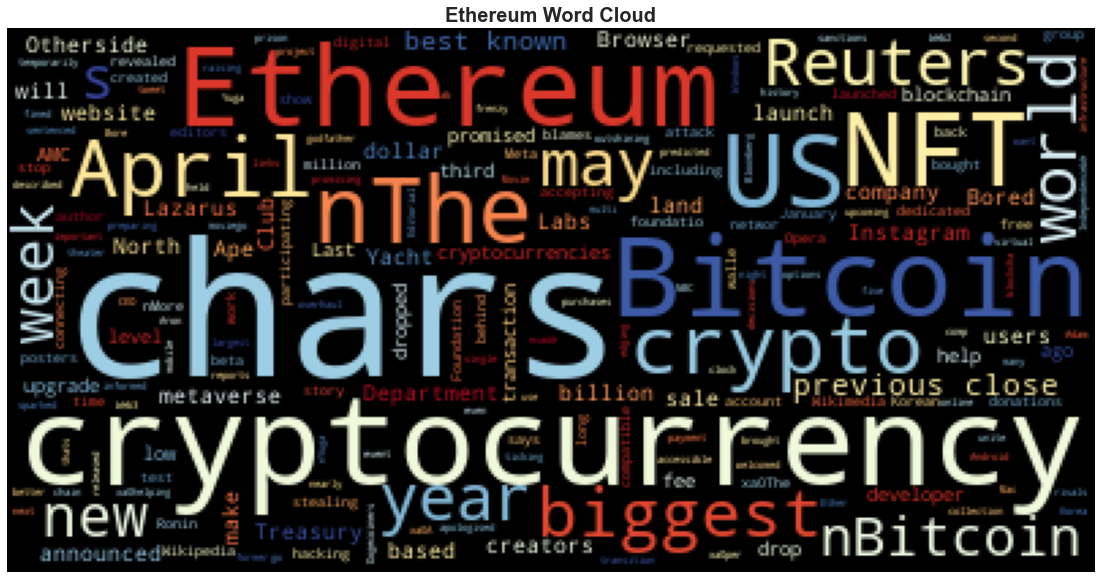

In [184]:
# Generate the Ethereum word cloud
terms_list_eth = str(ethereum_df["text"].tolist())

# Create the word cloud
wordcloud = WordCloud(colormap="RdYlBu").generate(terms_list_eth)
plt.imshow(wordcloud)
plt.axis("off")
fontdict = {"fontsize": 20, "fontweight": "bold"}
plt.title("Ethereum Word Cloud", fontdict=fontdict)
plt.show()

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [185]:
import spacy
from spacy import displacy

In [186]:
# Download the language model for SpaCy
# python -m spacy download en_core_web_sm

In [187]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [188]:
# Concatenate all of the Bitcoin text together
article_btc = terms_list_btc
doc_btc = nlp(article_btc)

In [189]:
# Run the NER processor on all of the text


# Add a title to the document
# YOUR CODE HERE!

In [190]:
# Render the visualization
displacy.render(doc_btc, style='ent')

In [191]:
# List all Entities
entities = [ent.text for ent in doc_btc.ents]
entities

['Odeniran',
 'Linden',
 'Texas',
 'April 4th, 2022',
 'Photo',
 'FRANCOIS PICARD/AFP',
 'Getty Images\\r\\n\\n \\n\\n',
 'Wikipedia',
 "the Wikimedia Foundation's",
 'Ars Technica',
 'GorillaWarfare',
 'Warren Buffett',
 'the weekend',
 'Getty Images\\r\\nThe value',
 'the weekend',
 '34,000',
 '27,630',
 'Coinbase',
 '+2164',
 'luck.\\r\\nLast week',
 'Fidelity Investments',
 'the US Treasury',
 'Reuters',
 '$10 billion',
 'Jack Dorsey',
 'three',
 'App',
 'Thursday',
 'Cash App',
 "'18",
 '15',
 'author\\r\\nMore than 200',
 'Wikipedia',
 'the Wikimedia Foundation',
 '+4016',
 'last July',
 '33,000',
 'the week',
 'last week',
 'Fed',
 'April 26',
 'Reuters',
 '5.1%',
 '38,391.36',
 'Tuesday',
 '2,229.82',
 '16%',
 'year',
 'May 4',
 'Reuters',
 '5.7%',
 '39,862.84',
 'Wednesday',
 '2,102.94',
 '20.9%',
 'year',
 "Posted \\r\\nFrom Bitcoin's",
 'Gucci handbag',
 'week',
 'Kristy Kilburn',
 'May 9',
 'Reuters',
 '7.81%',
 '31,333.41',
 'GMT',
 'Monday',
 '2,655.98',
 '35%',
 'AMC',
 

---

### Ethereum NER

In [192]:
# Concatenate all of the Ethereum text together
article_eth = terms_list_eth
doc_eth = nlp(article_eth)

In [193]:
# Run the NER processor on all of the text
# YOUR CODE HERE!

# Add a title to the document
# YOUR CODE HERE!

In [194]:
# Render the visualization
displacy.render(doc_eth, style='ent')

In [195]:
# List all Entities
entities = [ent.text for ent in doc_eth.ents]
entities

['Department of Treasury',
 'attack\\r\\nThe US Treasury Department',
 'North Korean',
 '$625 million',
 'Ronin',
 "'18",
 '15',
 'author\\r\\nMore than 200',
 'Wikipedia',
 'the Wikimedia Foundation',
 '+4016',
 'Instagram',
 'US',
 'Instagram',
 'Crypto Browser',
 'January',
 'Windows, Mac',
 'Android',
 'Ethereum',
 'Yacht Club',
 'Yuga Labs',
 'Otherside NFT',
 'April 30',
 'NFT',
 '+6669',
 'Ethereum',
 'more than five years',
 '100,000',
 'for\\xa0helping',
 'North Korea',
 'US',
 'NBC News',
 'April 26',
 'Reuters',
 'second',
 'AMC',
 'April 15',
 'AMC',
 'Adam Aron',
 'Last night',
 'Bloomberg',
 'nearly a third',
 'a billion dollars',
 'Editorial IndependenceWe',
 "'40 days ago",
 '47,454',
 '34,007',
 '28%.About a third',
 'this week',
 'Early this week',
 'the Ukrainian Computer Emergency Response Team',
 'Slovakian',
 'Russia',
 'Ethereum',
 'Merge',
 'a few months',
 'June.\\r\\nThe',
 'first',
 'a year and a half ago',
 'The Order Flow',
 'Dan Robinson',
 'Georgios',
 'A

---